<a href="https://colab.research.google.com/github/thlavlu/PyTorchProjects/blob/main/CNNProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root = '/cnn_data',train=True, download=True, transform = transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17812721.45it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 484393.58it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4411787.36it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3687674.95it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [4]:
test_data = datasets.MNIST(root = '/cnn_data',train=False, download=True, transform = transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
#creating batch size as 10
train_loader = DataLoader(train_data,batch_size= 10, shuffle= True)
test_loader = DataLoader(train_data,batch_size= 10, shuffle= False)

In [8]:
#Defining the CNN model
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [9]:
#Load MNIST data
for i, (X_Train, y_train) in enumerate(train_data):
    break

In [48]:
X_Train.shape

torch.Size([1, 28, 28])

In [49]:
 x = X_Train.view(1,1,28,28)

In [50]:
# Perform fist cnn model
x = F.relu(conv1(x)) # Rectrified Linear Unit


In [51]:
x

tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]],

         [[1.1425e-01, 1.1425e-01, 1.1425e-01,  ..., 1.1425e-01,
           1.1425e-01, 1.1425e-01],
          [1.1425e-01, 1.1425e-01, 1.1425e-01,  ..., 1.1425e-01,
           1.1425e-01, 1.1425e-01],
          [1.1425e-01, 1.1425e-01, 1.1425e-01,  ..., 1.1425e-01,
           1.1425e-01, 1.1425e-01],
          ...,
          [1.1425e-01, 1.1425e-01, 2.0888e-01,  ..., 1.1425

In [52]:
x.shape # 1 image, 6 filters, 26*26

torch.Size([1, 6, 26, 26])

In [53]:
# pass though the pooling layer
x = F.max_pool2d(x,2,2) # karnel of 2 and stide of 2

In [54]:
x.shape

torch.Size([1, 6, 13, 13])

In [55]:
# Perform fist cnn model
x = F.relu(conv2(x)) # Rectrified Linear Unit

In [18]:
x.shape # loosing 2 pixels around the outise, as didn't set any padding

torch.Size([1, 16, 11, 11])

In [19]:
# pass though the pooling layer
x = F.max_pool2d(x,2,2) # karnel of 2 and stide of 2

In [56]:
x.shape

torch.Size([1, 16, 11, 11])

**Creating the Model**

In [61]:
# Model Class

class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    # Connected layer
    self.fc1  =nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    # second round
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

  # faltten data to review
    X = X.view(-1,16*5*5)  # negetive -1 for varying batch size

  # Fully connected
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [62]:
# Creating instance of the Model
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [63]:
# Loss Functional Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

**Train and Test Model**

In [74]:
import time
start_time = time.time()

# Creating variables for tracking
epoch = 5
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
# For loop
for i in range(epoch):
  trn_corr= 0
  tst_corr=0
  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start batch with 1
    y_pred = model(X_train) # get predicted values from the training set
    loss = criterion(y_pred,y_train) # compare the predictions to correct

    predicted = torch.max(y_pred.data,1)[1] # add the number of correct prediction
    batch_corr = (predicted== y_train).sum() # how may we got correct from this batch
    trn_corr+=batch_corr
    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Printing the result
    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  # Test
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1] # adding correct prediction
      tst_corr+= (predicted == y_test).sum()

  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training time: {total/60} min')

Epoch: 0 Batch: 600 Loss: 0.00019168795552104712
Epoch: 0 Batch: 1200 Loss: 6.174942427605856e-06
Epoch: 0 Batch: 1800 Loss: 5.8558780438033864e-05
Epoch: 0 Batch: 2400 Loss: 0.003929711878299713
Epoch: 0 Batch: 3000 Loss: 1.8452736185281537e-05
Epoch: 0 Batch: 3600 Loss: 0.000239031549426727
Epoch: 0 Batch: 4200 Loss: 9.687452256912366e-05
Epoch: 0 Batch: 4800 Loss: 0.06859482079744339
Epoch: 0 Batch: 5400 Loss: 0.0002109899651259184
Epoch: 0 Batch: 6000 Loss: 0.029912516474723816
Epoch: 1 Batch: 600 Loss: 9.608749678591266e-05
Epoch: 1 Batch: 1200 Loss: 0.014503082260489464
Epoch: 1 Batch: 1800 Loss: 1.0525647667236626e-05
Epoch: 1 Batch: 2400 Loss: 0.5107269287109375
Epoch: 1 Batch: 3000 Loss: 0.0018520208541303873
Epoch: 1 Batch: 3600 Loss: 2.1576743165496737e-06
Epoch: 1 Batch: 4200 Loss: 0.0008477006922475994
Epoch: 1 Batch: 4800 Loss: 0.0021823090501129627
Epoch: 1 Batch: 5400 Loss: 1.2040114825140336e-06
Epoch: 1 Batch: 6000 Loss: 0.2543947100639343
Epoch: 2 Batch: 600 Loss: 0.

**Finding accuracy**

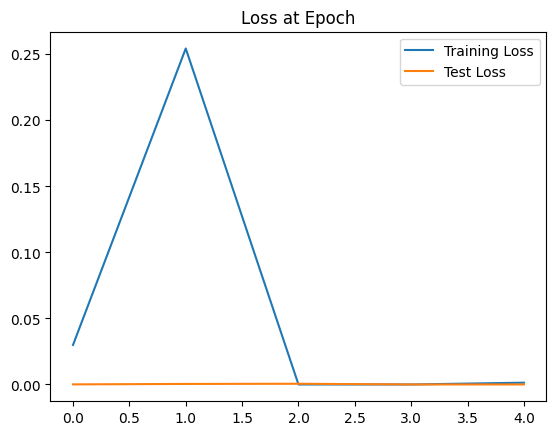

In [75]:
# Graph the losss at epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses,label = "Training Loss")
plt.plot(test_losses, label = "Test Loss")
plt.title("Loss at Epoch")
plt.legend()

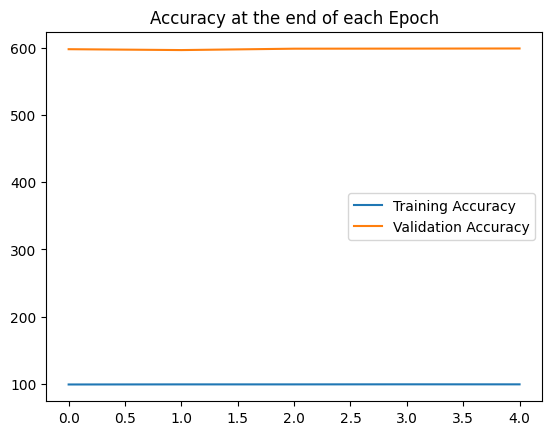

In [78]:
# Graph the accuracy
plt.plot([t/600 for t in train_correct],label = "Training Accuracy")
plt.plot([t/100 for t in test_correct],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

In [82]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [83]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_loader:
    y_val = model(X_test)
    predited = torch.max(y_val,1)[1]
    correct+= (predicted == y_test).sum()


In [85]:
correct.item()/len(test_data)*100

58.76

**Checking new input**

In [88]:
test_data[4546]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [89]:
test_data[4546][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

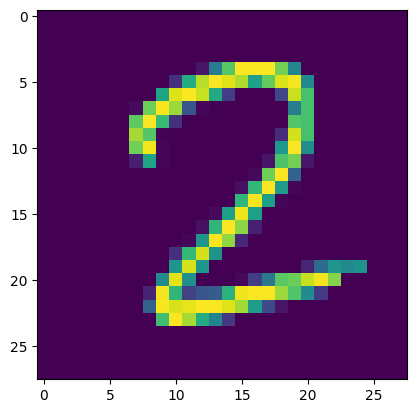

In [91]:
plt.imshow(test_data[4546][0].reshape(28,28))

In [93]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4546][0].reshape(1,1,28,28))

In [94]:
  new_prediction.argmax()

tensor(2)